![title](Header__0004_6.png "Header")
___
# Chapter 6 - Cluster Analysis
## Segment 2 - Hierarchial methods
#### Setting up for clustering analysis

In [1]:
import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [2]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [7]:
address = 'C:/Users/doll/Desktop/datascience/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

X = cars.ix[:,(1,3,4,6)].values

y = cars.ix[:,(9)].values

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


In [14]:
cars.head(10)

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


### Using scipy to generate dendrograms

In [8]:
Z = linkage(X, 'ward')

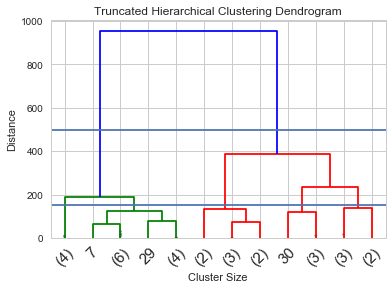

In [9]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)

plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

### Generating hierarchical clusters

In [10]:
k=2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [11]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.4375

In [12]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [16]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.71875